In [1]:
import numpy as np
import torch

In [2]:
current_patch = np.array([[[1,2,3], [4,5,6]],
                          [[1,2,3], [4,5,6]],
                          [[10,20,30], [40,50,60]],
                          [[0,2,3], [3,5,6]],
                          ])# shape: B, Min, Max
scale_factor = np.array([2,2,3])
current_patch

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 1,  2,  3],
        [ 4,  5,  6]],

       [[10, 20, 30],
        [40, 50, 60]],

       [[ 0,  2,  3],
        [ 3,  5,  6]]])

In [3]:
current_patch * scale_factor

array([[[  2,   4,   9],
        [  8,  10,  18]],

       [[  2,   4,   9],
        [  8,  10,  18]],

       [[ 20,  40,  90],
        [ 80, 100, 180]],

       [[  0,   4,   9],
        [  6,  10,  18]]])

In [4]:
current_patch[0] = np.array([[1,2,3], [4,5,6]])

In [5]:
temp = torch.tensor(current_patch) 
temp.names = ['B', 'Min', 'Max']
temp.names = [None, None, None]
temp.permute(1,2,0).shape
temp.names

/tmp/ipykernel_3593870/532464939.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1921.)
  temp.names = ['B', 'Min', 'Max']


(None, None, None)

In [6]:
import torchio as tio
tio.__version__

'0.18.82'

In [7]:
import os
lengths = []
for object in os.listdir('/local/scratch/clmn1/data/DAVIS/JPEGImages/480p'):
    lengths.append(len(os.listdir(f'/local/scratch/clmn1/data/DAVIS/JPEGImages/480p/{object}')))
print(min(lengths), max(lengths))

25 104


In [8]:
import numpy as np
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
arr[0:1]

array([1])

In [9]:
import cv2
label = cv2.imread("/local/scratch/clmn1/data/cholecseg8k/video01/video01_00080/frame_80_endo_color_mask.png")
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
label = np.array(label)
mask = label == (0,0,0)
mask = np.all(mask, axis=-1)
mask.shape

(480, 854)

In [10]:
np.unique(np.reshape(label, (-1, 3)), axis=0)

array([[127, 127, 127],
       [186, 183,  75],
       [231,  70, 156],
       [255, 114, 114],
       [255, 160, 165],
       [255, 255, 255]], dtype=uint8)

In [11]:
np.array([1,2,3])

array([1, 2, 3])

In [12]:
a = np.zeros((3,3,5))
b = np.ones((3,3,5))
np.stack((a,b)).shape

(2, 3, 3, 5)

In [1]:
import pickle as pkl
SPLIT_FILE = r"/local/scratch/clmn1/octree_study/Experiments/cholec_seg_5_OctreeNCA3D/data_split.dt"
SPLIT = pkl.load(open(SPLIT_FILE, "rb"))

/home/nlemke/remote/miniconda3/envs/nca3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/nlemke/remote/miniconda3/envs/nca3/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
SPLIT.get_images("test")

['video01_16585',
 'video01_28660',
 'video01_14859',
 'video01_28900',
 'video01_16425',
 'video01_00240',
 'video01_28580',
 'video01_28740',
 'video01_14939',
 'video01_16345',
 'video01_00160',
 'video01_00080',
 'video01_15099',
 'video01_28820',
 'video01_15019',
 'video01_00400',
 'video52_00480',
 'video52_00320',
 'video52_00160',
 'video52_00240',
 'video52_00400',
 'video52_02746',
 'video52_00000',
 'video52_02826',
 'video52_02906',
 'video52_00080',
 'video12_15750',
 'video12_19900',
 'video12_19500',
 'video12_19740',
 'video12_19980',
 'video12_19660',
 'video12_19580',
 'video12_15830',
 'video17_01803',
 'video17_01563',
 'video17_01643',
 'video17_01963',
 'video27_00240',
 'video27_00480',
 'video27_00400',
 'video27_00640',
 'video27_00160']

In [4]:
import torch

model = torch.nn.Sequential(
    torch.nn.Linear(10, 10),
    torch.nn.Linear(10, 10),
    torch.nn.Linear(10, 10),
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(torch.optim.Adam(model.parameters()), 2000)
print(scheduler.last_epoch)
scheduler.step()
print(scheduler.last_epoch)
scheduler.step()
print(scheduler.last_epoch)

0
1
2


/home/nlemke/remote/miniconda3/envs/nca3/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


In [3]:
import torch

tuple([320,320,2]) == torch.zeros(320,320,2).shape

True

In [2]:
1==1==2

False

In [4]:
import torch, einops
from positional_encodings.torch_encodings import PositionalEncoding1D, PositionalEncoding2D, PositionalEncoding3D

e = PositionalEncoding2D(2)(torch.ones(1,  4, 4, 2))
einops.rearrange(e, 'b h w c -> b c h w')

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.8415,  0.8415,  0.8415,  0.8415],
          [ 0.9093,  0.9093,  0.9093,  0.9093],
          [ 0.1411,  0.1411,  0.1411,  0.1411]],

         [[ 1.0000,  1.0000,  1.0000,  1.0000],
          [ 0.5403,  0.5403,  0.5403,  0.5403],
          [-0.4161, -0.4161, -0.4161, -0.4161],
          [-0.9900, -0.9900, -0.9900, -0.9900]]]])

In [21]:
from src.utils.vitca_utils import vit_positional_encoding
t = torch.zeros(1,4,4,4)
t = einops.rearrange(t, 'b c h w -> b (h w) c')

t = vit_positional_encoding(t.shape[-2], t.shape[-1])

#einops.rearrange(t, 'b (h w) c -> b h w c', h=4, w=4)
t

tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.9950,  0.0100,  1.0000],
         [ 0.9093,  0.9801,  0.0200,  1.0000],
         [ 0.1411,  0.9553,  0.0300,  1.0000],
         [-0.7568,  0.9211,  0.0400,  1.0000],
         [-0.9589,  0.8776,  0.0500,  1.0000],
         [-0.2794,  0.8253,  0.0600,  1.0000],
         [ 0.6570,  0.7648,  0.0699,  1.0000],
         [ 0.9894,  0.6967,  0.0799,  1.0000],
         [ 0.4121,  0.6216,  0.0899,  1.0000],
         [-0.5440,  0.5403,  0.0998,  0.9999],
         [-1.0000,  0.4536,  0.1098,  0.9999],
         [-0.5366,  0.3624,  0.1197,  0.9999],
         [ 0.4202,  0.2675,  0.1296,  0.9999],
         [ 0.9906,  0.1700,  0.1395,  0.9999],
         [ 0.6503,  0.0707,  0.1494,  0.9999]]])

In [20]:
p_enc_2d = PositionalEncoding1D(4)
y = torch.zeros((1,16,4))
print(p_enc_2d(y))

tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.5403,  0.0100,  0.9999],
         [ 0.9093, -0.4161,  0.0200,  0.9998],
         [ 0.1411, -0.9900,  0.0300,  0.9996],
         [-0.7568, -0.6536,  0.0400,  0.9992],
         [-0.9589,  0.2837,  0.0500,  0.9988],
         [-0.2794,  0.9602,  0.0600,  0.9982],
         [ 0.6570,  0.7539,  0.0699,  0.9976],
         [ 0.9894, -0.1455,  0.0799,  0.9968],
         [ 0.4121, -0.9111,  0.0899,  0.9960],
         [-0.5440, -0.8391,  0.0998,  0.9950],
         [-1.0000,  0.0044,  0.1098,  0.9940],
         [-0.5366,  0.8439,  0.1197,  0.9928],
         [ 0.4202,  0.9074,  0.1296,  0.9916],
         [ 0.9906,  0.1367,  0.1395,  0.9902],
         [ 0.6503, -0.7597,  0.1494,  0.9888]]])


In [13]:
p_enc_2d = PositionalEncoding2D(4)
y = torch.zeros((1,4,4,4))
print(p_enc_2d(y)) # (1, 6, 2, 8)

tensor([[[[ 0.0000,  1.0000,  0.0000,  1.0000],
          [ 0.0000,  1.0000,  0.8415,  0.5403],
          [ 0.0000,  1.0000,  0.9093, -0.4161],
          [ 0.0000,  1.0000,  0.1411, -0.9900]],

         [[ 0.8415,  0.5403,  0.0000,  1.0000],
          [ 0.8415,  0.5403,  0.8415,  0.5403],
          [ 0.8415,  0.5403,  0.9093, -0.4161],
          [ 0.8415,  0.5403,  0.1411, -0.9900]],

         [[ 0.9093, -0.4161,  0.0000,  1.0000],
          [ 0.9093, -0.4161,  0.8415,  0.5403],
          [ 0.9093, -0.4161,  0.9093, -0.4161],
          [ 0.9093, -0.4161,  0.1411, -0.9900]],

         [[ 0.1411, -0.9900,  0.0000,  1.0000],
          [ 0.1411, -0.9900,  0.8415,  0.5403],
          [ 0.1411, -0.9900,  0.9093, -0.4161],
          [ 0.1411, -0.9900,  0.1411, -0.9900]]]])


In [11]:
pe = torch.zeros(1,4,4,2)
for x in range(4):
    for y in range(4):
        pe[:,x,y,0] = torch.sin(torch.Tensor([x / 10000 ** (4 * 0 / 2)]))

pe

tensor([[[[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000]],

         [[0.8415, 0.0000],
          [0.8415, 0.0000],
          [0.8415, 0.0000],
          [0.8415, 0.0000]],

         [[0.9093, 0.0000],
          [0.9093, 0.0000],
          [0.9093, 0.0000],
          [0.9093, 0.0000]],

         [[0.1411, 0.0000],
          [0.1411, 0.0000],
          [0.1411, 0.0000],
          [0.1411, 0.0000]]]])

In [25]:
import torch, torch.nn as nn, einops

inin = torch.rand(1, 4, 16)
inin = torch.cat((inin, -inin), dim=1)
out = nn.LayerNorm(16, elementwise_affine=False)(inin)

In [38]:
inin[0,2].var()

tensor(0.1110)

In [47]:
mine = inin - inin.mean(-1, keepdim=True) / (inin.std(-1, keepdim=True) **0.5 + 1e-5)
mine[0,0].mean()

tensor(-0.5606)

In [46]:
out[0,0].mean()

tensor(2.6450e-07)

In [12]:
import colormaps as cmaps
import numpy as np
np.array(cmaps.bold[1].colors)


array([0.06666667, 0.64705882, 0.4745098 ])

In [26]:
import torch

x = torch.rand(2, 3, 4, 4)

with torch.no_grad():
    _max = torch.amax(x, dim=tuple(range(1,len(x.shape))), keepdim=True)
    _min = torch.amin(x, dim=(1,2,3), keepdim=True)


rgb_overflow_loss = (x - torch.clamp(x, _min, _max)).abs().mean()

In [25]:
tuple(range(1,len(x.shape)))

(1, 2, 3)

In [3]:
import torchio as tio
import torch
severity = 2
x = torch.randn(1, 32, 32, 16)
#ghosting
transform = tio.RandomGhosting(num_ghosts=severity, intensity=0.25 * severity)

x = transform(x)

In [4]:
print(transform)

RandomGhosting()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

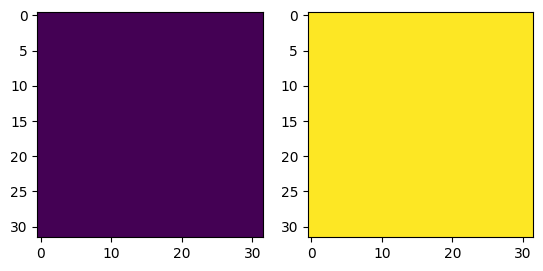

In [7]:
plt.subplot(1,2,1)
plt.imshow(np.zeros((32,32)), vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(np.ones((32,32)), vmin=0, vmax=1)

#plt.colorbar()